In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import cv2
from google.colab.patches import cv2_imshow
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
# بارگذاری دیتاست MNIST
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
# پیش‌پردازش داده‌ها
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
 # تبدیل برچسب‌ها به فرم one-hot
train_labels = keras.utils.to_categorical(train_labels)
test_labels = keras.utils.to_categorical(test_labels)

# ساخت مدل CNN
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
# کامپایل مدل
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# آموزش مدل
history = model.fit(train_images, train_labels,
                    epochs=5,
                    batch_size=64,
                    validation_split=0.2)

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 32s 39ms/step - accuracy: 0.8601 - loss: 0.4794 - val_accuracy: 0.9762 - val_loss: 0.0780
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.9811 - loss: 0.0616 - val_accuracy: 0.9852 - val_loss: 0.0515
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 44s 40ms/step - accuracy: 0.9866 - loss: 0.0409 - val_accuracy: 0.9875 - val_loss: 0.0449
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 26s 34ms/step - accuracy: 0.9905 - loss: 0.0302 - val_accuracy: 0.9886 - val_loss: 0.0391
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.9931 - loss: 0.0216 - val_accuracy: 0.9882 - val_loss: 0.0391


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9863 - loss: 0.0413


دقت مدل روی داده تست: 0.9898999929428101
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


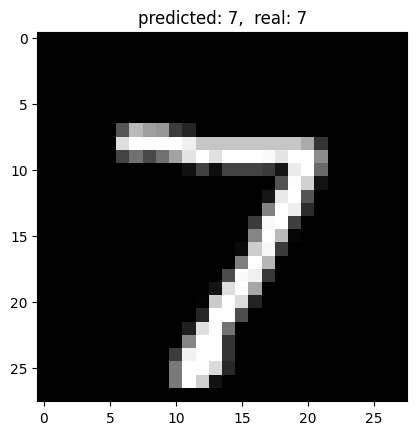

In [5]:
# ارزیابی مدل روی داده تست
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'دقت مدل روی داده تست: {test_acc}')

# ذخیره مدل
model.save('mnist_cnn_model.h5')

# نمایش نمونه‌ای از پیش‌بینی‌ها
predictions = model.predict(test_images)

# نمایش یک نمونه تصویر و پیش‌بینی آن
def plot_sample_prediction(index):
    plt.imshow(test_images[index].reshape(28, 28), cmap='gray')
    pred = np.argmax(predictions[index])
    true = np.argmax(test_labels[index])
    plt.title(f'predicted: {pred},  real: {true}')
    plt.show()

plot_sample_prediction(0)  # نمایش اولین تصویر در مجموعه تست

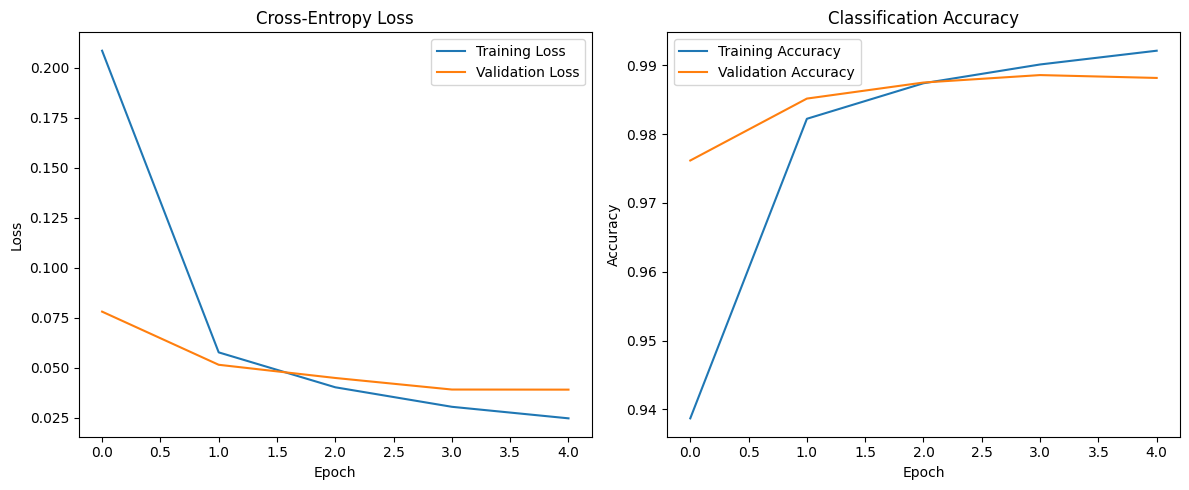

In [11]:
# تابع رسم نمودارها
def plot_training_history(history):
    plt.figure(figsize=(12, 5))

    # نمودار Loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Cross-Entropy Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # نمودار Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Classification Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

# فراخوانی تابع برای رسم نمودارها
plot_training_history(history)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


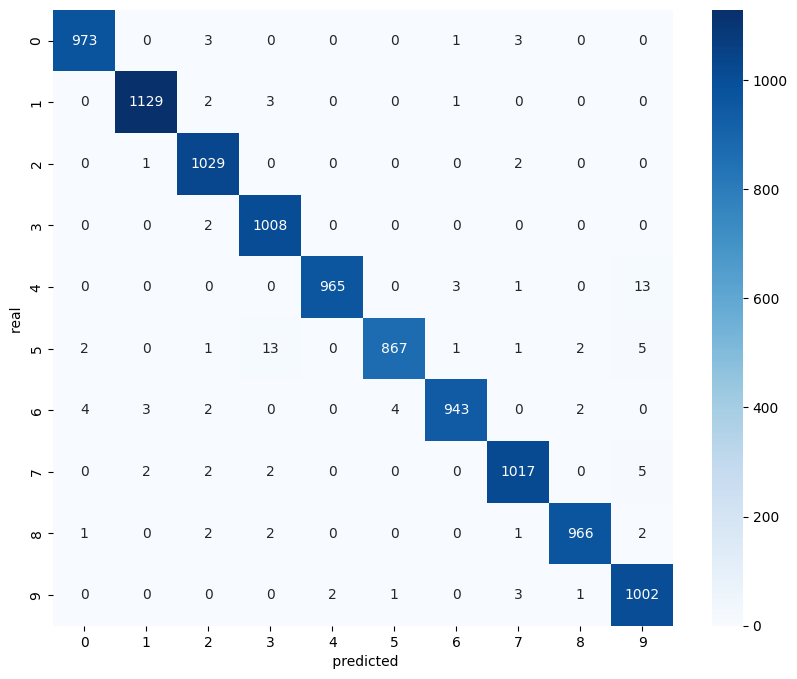

In [14]:
# بارگیری داده‌های تست
(_, _), (test_images, test_labels) = mnist.load_data()
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# پیش‌بینی روی داده‌های تست
y_pred = model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_labels

# محاسبه ماتریس درهم‌ریختگی
cm = confusion_matrix(y_true, y_pred_classes)

# رسم ماتریس
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=range(10), yticklabels=range(10))
plt.xlabel(' predicted')
plt.ylabel('real ')
plt.show()

In [15]:
#اتصال به github
!git clone https://github.com/E-Khoshbakht98/CNN2.git

Cloning into 'CNN2'...
remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 4 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (4/4), 131.75 KiB | 1.86 MiB/s, done.


In [16]:
#ذخیره مدل
model = keras.models.load_model('mnist_cnn_model.h5')

In [17]:
#تعریف پیش پردازش تصویر
def preprocess_image(image_path):

    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = 255 - img
    img = cv2.resize(img, (28, 28))
    img = img.astype('float32') / 255
    img = img.reshape(1, 28, 28, 1)

    return img

In [18]:

original_img = cv2.imread('number2.jpg', cv2.IMREAD_GRAYSCALE)

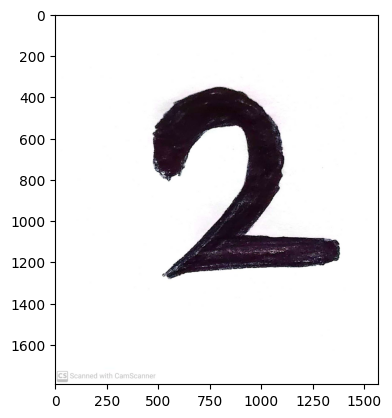

In [19]:
#نمایش تصویر اصلی
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open('/content/CNN2/number2.jpg')
plt.imshow(img)
plt.show()


تصویر پس از پردازش (آماده برای مدل):


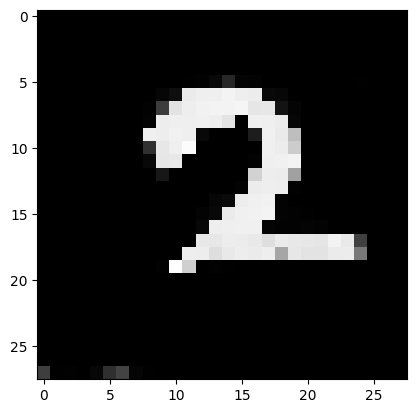

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step

مدل پیش‌بینی می‌کند این عدد 2 است با اطمینان 99.84%


In [20]:
#پیش پردازش تصویر
processed_img = preprocess_image('/content/CNN2/number2.jpg')
print("\nتصویر پس از پردازش (آماده برای مدل):")
plt.imshow(processed_img.reshape(28, 28), cmap='gray')
plt.show()


prediction = model.predict(processed_img)
predicted_number = np.argmax(prediction)

print(f"\nمدل پیش‌بینی می‌کند این عدد {predicted_number} است با اطمینان {np.max(prediction)*100:.2f}%")

In [21]:
#حساسیت به نویز
def test_noise_sensitivity(image, model, true_label):
    noise_levels = [0.01, 0.05, 0.1, 0.2]
    results = []

    for level in noise_levels:
        # اضافه کردن نویز گوسی
        noisy_img = image + np.random.normal(0, level, image.shape)
        noisy_img = np.clip(noisy_img, 0, 1)

        pred = model.predict(noisy_img[np.newaxis, ...])
        results.append({
            'noise_level': level,
            'prediction': np.argmax(pred),
            'confidence': np.max(pred),
            'correct': np.argmax(pred) == true_label
        })

    return pd.DataFrame(results)

# مثال استفاده:
results = test_noise_sensitivity(processed_img[0], model, 2)
print(results)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
   noise_level  prediction  confidence  correct
0         0.01           2    0.998394     True
1         0.05           2    0.998368     True
2         0.10           2    0.996616     True
3         0.20           2    0.997107     True


In [22]:
#حساسیت به چرخش
def test_rotation_sensitivity(image, model, true_label):
    angles = range(-30, 31, 5)
    results = []

    for angle in angles:
        # چرخش تصویر
        rows, cols = image.shape[:2]
        M = cv2.getRotationMatrix2D((cols/2, rows/2), angle, 1)
        rotated = cv2.warpAffine(image, M, (cols, rows))

        pred = model.predict(rotated[np.newaxis, ..., np.newaxis])
        results.append({
            'angle': angle,
            'prediction': np.argmax(pred),
            'confidence': np.max(pred),
            'correct': np.argmax(pred) == true_label
        })

    return pd.DataFrame(results)

# مثال استفاده:
rotation_results = test_rotation_sensitivity(processed_img[0], model, 2)
print(rotation_results)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
    angle  prediction  confidence  correct
0     -30           2    0.973523     True
1     -25           2    0.980365     True
2     -20           2    0.971594     True
3     -15           2    0.992603     True
4     -10           2    0.994484     True
5      -5           2    0.993597     True
6       0           2    0.998379     True
7       5           2    0.992092     True
8      10           2    0.971332     True
9      15           2    0.945414     True
10     20           2    0.724209

In [23]:
#حساسیت به روشنایی
def test_brightness_sensitivity(image, model, true_label):
    factors = [0.5, 0.7, 1.0, 1.3, 1.5, 2.0]
    results = []

    for factor in factors:
        # تغییر روشنایی
        adjusted = np.clip(image * factor, 0, 1)

        pred = model.predict(adjusted[np.newaxis, ...])
        results.append({
            'brightness_factor': factor,
            'prediction': np.argmax(pred),
            'confidence': np.max(pred),
            'correct': np.argmax(pred) == true_label
        })

    return pd.DataFrame(results)

# مثال استفاده:
brightness_results = test_brightness_sensitivity(processed_img[0], model, 2)
print(brightness_results)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
   brightness_factor  prediction  confidence  correct
0                0.5           2    0.916471     True
1                0.7           2    0.984076     True
2                1.0           2    0.998379     True
3                1.3           2    0.999249     True
4                1.5           2    0.999240     True
5                2.0           2    0.999257     True
